# Customer Segmentation

## Preliminary Analysis

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import matplotlib.cm as cm
import seaborn as sns
from scipy import stats
from datetime import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
# Read datasets
customers_df = pd.read_csv("data/olist_customers_dataset.csv")
geoloc_df = pd.read_csv("data/olist_geolocation_dataset.csv")
orderitems_df = pd.read_csv("data/olist_order_items_dataset.csv")
orderpay_df = pd.read_csv("data/olist_order_payments_dataset.csv")
orderreviews_df = pd.read_csv("data/olist_order_reviews_dataset.csv")
orders_df = pd.read_csv("data/olist_orders_dataset.csv")
products_df = pd.read_csv("data/olist_products_dataset.csv")
sellers_df = pd.read_csv("data/olist_sellers_dataset.csv")
catname_df = pd.read_csv("data/product_category_name_translation.csv")

### Customers

In [3]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [5]:
# Change Zip code to string
customers_df['customer_zip_code_prefix'] = customers_df['customer_zip_code_prefix'].apply(str)

In [6]:
customers_df.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [7]:
# Drop customer_unique_id, zip code prefix, and city as they are not needed
customers_df.drop(['customer_unique_id', 'customer_zip_code_prefix', 'customer_city'], axis = 1, inplace = True)

In [8]:
customers_df.head()

,customer_id,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,SP
1,18955e83d337fd6b2def6b18a428ac77,SP
2,4e7b3e00288586ebd08712fdd0374a03,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,SP


In [9]:
customers_df.shape

(99441, 2)

### Orders

In [10]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [11]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [12]:
# Convert date columns to datetime
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])

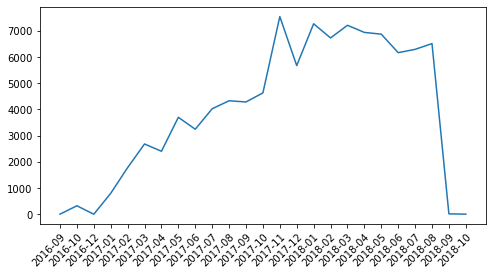

In [13]:
# Check purchase timestamp over time
orders_df_copy = orders_df.copy()
orders_df_copy['year_month'] = orders_df_copy['order_purchase_timestamp'].map(lambda dt: dt.strftime('%Y-%m'))

group_year_month = orders_df_copy.groupby('year_month')['order_id'].size().to_frame("count").reset_index()

fig, ax = plt.subplots(figsize = (8, 4))

plt.plot(group_year_month['year_month'], group_year_month['count'])
plt.xticks(rotation = 45, ha = 'right', rotation_mode = 'anchor')

plt.show()

In [14]:
orders_df.shape

(99441, 8)

In [15]:
# Delete order before Jan, 2017 and After Aug, 2018
orders_df = orders_df.loc[(orders_df['order_purchase_timestamp'] > '2016-12-31') & (orders_df['order_purchase_timestamp'] < '2018-08-01')]

In [16]:
orders_df.shape

(92580, 8)

In [17]:
# Check for empty values
orders_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  82
order_delivered_carrier_date     1602
order_delivered_customer_date    2727
order_estimated_delivery_date       0
dtype: int64

array([[<AxesSubplot:title={'center':'order_purchase_timestamp'}>,
        <AxesSubplot:title={'center':'order_approved_at'}>],
       [<AxesSubplot:title={'center':'order_delivered_carrier_date'}>,
        <AxesSubplot:title={'center':'order_delivered_customer_date'}>],
       [<AxesSubplot:title={'center':'order_estimated_delivery_date'}>,
        <AxesSubplot:>]], dtype=object)

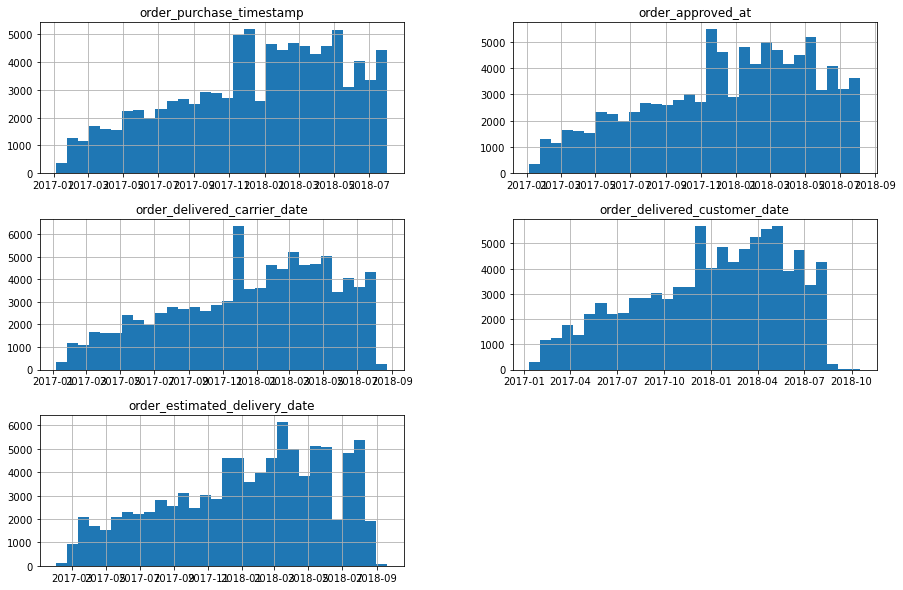

In [18]:
orders_df.hist(bins = 30, figsize = (15, 10))

#### Order Status

In [19]:
# Check orders by order status
orders_df['order_status'].value_counts()

delivered      89860
shipped         1050
unavailable      595
canceled         496
processing       299
invoiced         273
created            5
approved           2
Name: order_status, dtype: int64

##### Order Status - order_approved_at

In [20]:
# Check orders with no order approved at and their order status
orders_df[orders_df['order_approved_at'].isna()]['order_status'].value_counts()

canceled     63
delivered    14
created       5
Name: order_status, dtype: int64

A delivered order status should have an order approval date

In [21]:
approval_check = ((orders_df['order_approved_at'].isna()) & (orders_df['order_status'] == 'delivered'))
orders_df[approval_check]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaT,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaT,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaT,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaT,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaT,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaT,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaT,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20


In [22]:
# Use the order purchase timestamp as the order approved at
orders_df.loc[approval_check, 'order_approved_at'] = orders_df.loc[approval_check, 'order_purchase_timestamp']

In [23]:
# Check orders with no order approved at and their order status
orders_df[orders_df['order_approved_at'].isna()]['order_status'].value_counts()

canceled    63
created      5
Name: order_status, dtype: int64

##### Order Status - order_delivered_carrier_date

In [24]:
# Check orders with no order delivered carrier date at and their order status
orders_df[orders_df['order_delivered_carrier_date'].isna()]['order_status'].value_counts()

unavailable    595
canceled       426
processing     299
invoiced       273
created          5
approved         2
delivered        2
Name: order_status, dtype: int64

The delivered status should have an order delivered carrier date.

In [25]:
carrier_check = ((orders_df['order_delivered_carrier_date'].isna()) & (orders_df['order_status'] == 'delivered'))
orders_df[carrier_check]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
73222,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,NaT,2017-11-20 19:44:47,2017-11-14
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,NaT,2017-06-23


We will use the order approved at date for the the order delivered date

In [26]:
orders_df.loc[carrier_check, 'order_delivered_carrier_date'] = orders_df.loc[carrier_check, 'order_approved_at']

In [27]:
orders_df[orders_df['order_delivered_carrier_date'].isna()]['order_status'].value_counts()

unavailable    595
canceled       426
processing     299
invoiced       273
created          5
approved         2
Name: order_status, dtype: int64

##### Order Status - order_delivered_customer_date

In [28]:
# Check orders with no order delivered customer date at and their order status
orders_df[orders_df['order_delivered_customer_date'].isna()]['order_status'].value_counts()

shipped        1050
unavailable     595
canceled        495
processing      299
invoiced        273
delivered         8
created           5
approved          2
Name: order_status, dtype: int64

The delivered status should have a date in it

In [29]:
customerdate_check = ((orders_df['order_delivered_customer_date'].isna()) & (orders_df['order_status'] == 'delivered'))
orders_df[customerdate_check]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaT,2018-07-30
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaT,2018-07-30
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaT,2018-07-24
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,2017-05-25 23:30:16,NaT,2017-06-23
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaT,2018-06-26
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaT,2018-07-19


To get the delivered customer date we will take the median the order delivered customer date - order delivered carrier date

In [30]:
orders_df['carrier_delivered_time'] = orders_df['order_delivered_customer_date'] - orders_df['order_delivered_carrier_date']
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,carrier_delivered_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6 days 01:30:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12 days 00:56:45
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9 days 10:48:43
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1 days 22:30:28
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,14 days 19:59:51


In [31]:
mid_carrier_delivered_time = orders_df['carrier_delivered_time'].median()
mid_carrier_delivered_time

Timedelta('7 days 05:21:22')

The median days between the two is 7 day so we will add these days to the order delivered customer date

In [32]:
orders_df.loc[customerdate_check, 'order_delivered_customer_date'] = orders_df.loc[customerdate_check, 'order_delivered_carrier_date'] + mid_carrier_delivered_time
    
orders_df.loc[customerdate_check, 'carrier_delivered_time'] = mid_carrier_delivered_time

orders_df[customerdate_check]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,carrier_delivered_time
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,2017-12-07 23:33:45,2017-12-18,7 days 05:21:22
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,2018-07-02 13:26:22,2018-07-16,7 days 05:21:22
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,2018-07-10 19:18:22,2018-07-30,7 days 05:21:22
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,2018-07-10 19:18:22,2018-07-30,7 days 05:21:22
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,2018-07-10 14:49:22,2018-07-24,7 days 05:21:22
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,2017-05-25 23:30:16,2017-06-02 04:51:38,2017-06-23,7 days 05:21:22
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,2018-06-19 19:31:22,2018-06-26,7 days 05:21:22
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,2018-07-11 00:47:22,2018-07-19,7 days 05:21:22


In [33]:
# Check orders with no order delivered customer date at and their order status
orders_df[orders_df['order_delivered_customer_date'].isna()]['order_status'].value_counts()

shipped        1050
unavailable     595
canceled        495
processing      299
invoiced        273
created           5
approved          2
Name: order_status, dtype: int64

In [34]:
# Check empty values
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  68
order_delivered_carrier_date     1600
order_delivered_customer_date    2719
order_estimated_delivery_date       0
carrier_delivered_time           2719
dtype: int64

In [35]:
# Drop carrier delivered time as it is no longer needed
orders_df.drop(['carrier_delivered_time'], axis = 1, inplace = True)

In [36]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01


In [37]:
orders_df.shape

(92580, 8)

### Order Items

In [38]:
orderitems_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [39]:
orderitems_df.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [40]:
orderitems_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [41]:
# Drop seller id, shipping limit date
orderitems_df.drop(['seller_id', 'shipping_limit_date'], axis = 1, inplace = True)

In [42]:
orderitems_df.head()

,order_id,order_item_id,product_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14


In [43]:
orderitems_df.shape

(112650, 5)

### Order Payments

In [44]:
orderpay_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [45]:
orderpay_df.shape

(103886, 5)

The payment value is the price and freight together so I dropped this dataset as it was not needed

### Order Reviews

In [46]:
orderreviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


As this analysis is on customer segmentation, I will keep only the order_id and review_score.  The rest may be used for sentiment analysis at a later time.

In [47]:
# Drop all columns except order_id and review_score
orderreviews_df.drop(['review_id', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp'], 
                     axis = 1, inplace = True)

In [48]:
orderreviews_df.isnull().sum()

order_id        0
review_score    0
dtype: int64

In [49]:
orderreviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [50]:
orderreviews_df.shape

(99224, 2)

### Products

In [51]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [52]:
# Merge the category names in english with the products and remove the portuguese names
products_df = pd.merge(products_df, catname_df, on='product_category_name', how='left')
products_df.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure


In [53]:
# Remove unneccessary columns
products_df.drop(columns=["product_name_lenght", "product_description_lenght",
                         "product_photos_qty", "product_weight_g", "product_length_cm", 
                         "product_height_cm", "product_width_cm"], axis = 1, inplace = True)
products_df.head()

,product_id,product_category_name,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares


In [54]:
products_df.isnull().sum()

product_id                         0
product_category_name            610
product_category_name_english    623
dtype: int64

In [55]:
products_df[products_df["product_category_name_english"].isnull() == True]["product_category_name"].value_counts()

portateis_cozinha_e_preparadores_de_alimentos    10
pc_gamer                                          3
Name: product_category_name, dtype: int64

In [56]:
null_1 = products_df[products_df["product_category_name"] == "portateis_cozinha_e_preparadores_de_alimentos"]["product_category_name_english"]
null_2 = products_df[products_df["product_category_name"] == "pc_gamer"]["product_category_name_english"]

In [57]:
products_df.loc[null_1.index,"product_category_name_english"] = "kitchen_laptops_and_food_preparators"
products_df.loc[null_2.index,"product_category_name_english"] = "pc_gamer"

In [58]:
products_df.isnull().sum()

product_id                         0
product_category_name            610
product_category_name_english    610
dtype: int64

In [59]:
products_df.drop(['product_category_name'], axis = 1, inplace = True)

In [60]:
# Change product category name column
products_df.columns = products_df.columns.str.replace('product_category_name_english', 'product_category_name')

In [61]:
# Fill all empty category names to Category None
products_df['product_category_name'] = products_df['product_category_name'].fillna('category_none')

In [62]:
products_df.isnull().sum()

product_id               0
product_category_name    0
dtype: int64

In [63]:
products_df.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,art
2,96bd76ec8810374ed1b65e291975717f,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,baby
4,9dc1a7de274444849c219cff195d0b71,housewares


In [64]:
products_df.shape

(32951, 2)

### Sellers

In [65]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [66]:
sellers_df.shape

(3095, 4)

This dataset has no features that will be of use to this study, this dataset will not get merged into the final one.

## Merge datasets for further analysis

In [67]:
olist_df = orders_df.merge(orderreviews_df, on = 'order_id')
olist_df = olist_df.merge(orderitems_df, on = 'order_id')
olist_df = olist_df.merge(customers_df, on = 'customer_id')
olist_df = olist_df.merge(products_df, on = 'product_id')

In [68]:
olist_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,product_id,price,freight_value,customer_state,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,4,1,87285b34884572647811a353c7ac498a,29.99,8.72,SP,housewares
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,4,1,87285b34884572647811a353c7ac498a,29.99,7.78,SP,housewares
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,5,1,87285b34884572647811a353c7ac498a,29.99,7.78,SP,housewares
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13,3,1,87285b34884572647811a353c7ac498a,29.99,14.10,SC,housewares
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,4,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,BA,perfumery


In [69]:
olist_df.shape

(104782, 15)

In [70]:
olist_df.describe()

,review_score,order_item_id,price,freight_value
count,104782.000000,104782.000000,104782.000000,104782.000000
mean,4.021502,1.197868,120.516142,19.941800
std,1.394186,0.698074,181.862447,15.688334
min,1.000000,1.000000,0.850000,0.000000
25%,4.000000,1.000000,39.900000,13.080000
50%,5.000000,1.000000,74.990000,16.220000
75%,5.000000,1.000000,134.900000,21.120000
max,5.000000,21.000000,6735.000000,409.680000


In [71]:
olist_df.describe(include = 'O')

,order_id,customer_id,order_status,product_id,customer_state,product_category_name
count,104782,104782,104782,104782,104782,104782
unique,91182,91182,6,30542,27,74
top,5a3b1c29a49756e75f1ef513383c0c12,be1c4e52bb71e0c54b11a26b8e8d59f2,delivered,aca2eb7d00ea1a7b8ebd4e68314663af,SP,bed_bath_table
freq,22,22,102576,521,43635,10475


In [72]:
olist_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1089
order_delivered_customer_date    2205
order_estimated_delivery_date       0
review_score                        0
order_item_id                       0
product_id                          0
price                               0
freight_value                       0
customer_state                      0
product_category_name               0
dtype: int64

array([[<AxesSubplot:title={'center':'order_purchase_timestamp'}>,
        <AxesSubplot:title={'center':'order_approved_at'}>,
        <AxesSubplot:title={'center':'order_delivered_carrier_date'}>],
       [<AxesSubplot:title={'center':'order_delivered_customer_date'}>,
        <AxesSubplot:title={'center':'order_estimated_delivery_date'}>,
        <AxesSubplot:title={'center':'review_score'}>],
       [<AxesSubplot:title={'center':'order_item_id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'freight_value'}>]], dtype=object)

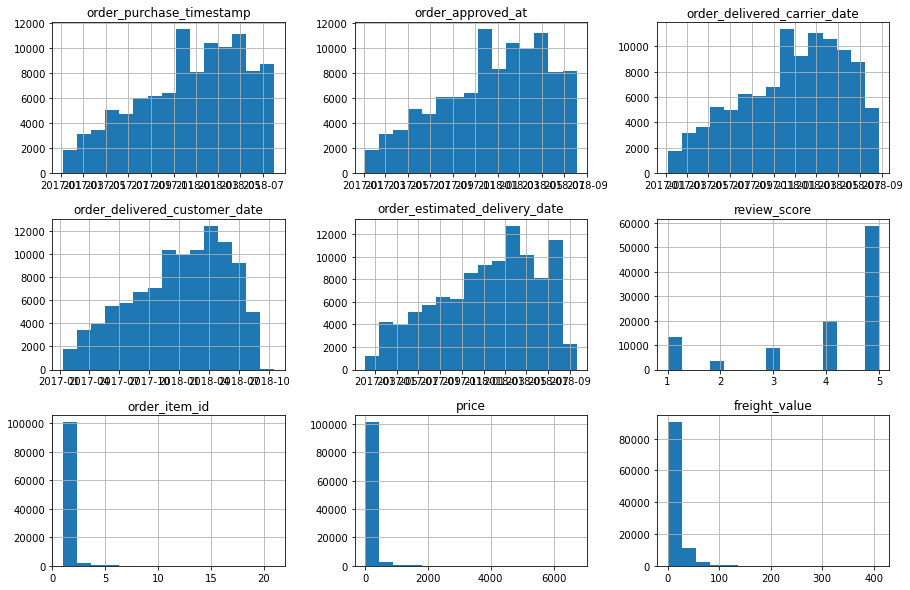

In [73]:
# Histograms
olist_df.hist(bins = 15, figsize = (15, 10))

Most of the data is skewed with the dates being left skewed and everything else right skewed

### Visualizations

Create visualizations dataset

In [74]:
visualizations_df = olist_df.copy()

In [75]:
# Split out order purchase timestamp into separate parts
visualizations_df['year'] = visualizations_df['order_purchase_timestamp'].dt.year.apply(str)
visualizations_df['month'] = visualizations_df['order_purchase_timestamp'].dt.month.apply(str)
visualizations_df['dow'] = visualizations_df['order_purchase_timestamp'].dt.day_name()
visualizations_df['hour'] = visualizations_df['order_purchase_timestamp'].dt.hour.apply(str)
visualizations_df['year_month'] = visualizations_df['order_purchase_timestamp'].map(lambda dt: dt.strftime('%Y-%m'))

visualizations_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,product_id,price,freight_value,customer_state,product_category_name,year,month,dow,hour,year_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,4,1,87285b34884572647811a353c7ac498a,29.99,8.72,SP,housewares,2017,10,Monday,10,2017-10
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,4,1,87285b34884572647811a353c7ac498a,29.99,7.78,SP,housewares,2017,8,Tuesday,18,2017-08
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,5,1,87285b34884572647811a353c7ac498a,29.99,7.78,SP,housewares,2017,8,Wednesday,18,2017-08
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13,3,1,87285b34884572647811a353c7ac498a,29.99,14.10,SC,housewares,2017,10,Monday,23,2017-10
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,4,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,BA,perfumery,2018,7,Tuesday,20,2018-07


#### Number of Orders per Year

In [76]:
per_year = visualizations_df.groupby('year')['order_id'].count().reset_index(name = 'count').sort_values(['count'], ascending = True)
per_year

,year,count
0,2017,50791
1,2018,53991


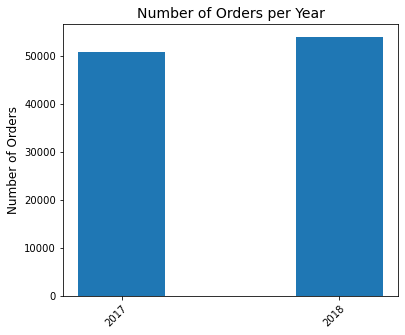

In [77]:
fig = plt.figure(figsize = (6, 5))

plt.bar(per_year['year'], per_year['count'], width = 0.4)
 
plt.xlabel("")
plt.xticks(per_year['year'], per_year['year'], rotation = 45, ha = 'right', rotation_mode = 'anchor')
plt.ylabel("Number of Orders", fontsize = 12)
plt.title("Number of Orders per Year", fontsize = 14)

plt.show()

Looks like 2018 was a better year than 2017 for the number of orders recevied.

#### Orders per Year per Month

In [78]:
per_year_month = visualizations_df.groupby('year_month').size().to_frame("count").reset_index()
per_year_month

,year_month,count
0,2017-01,955
1,2017-02,1951
2,2017-03,2994
3,2017-04,2670
4,2017-05,4142
5,2017-06,3593
6,2017-07,4526
7,2017-08,4905
8,2017-09,4828
9,2017-10,5316


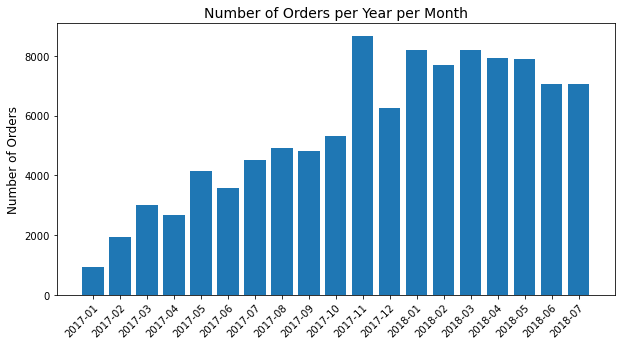

In [79]:
fig = plt.figure(figsize = (10, 5))

plt.bar(per_year_month['year_month'], per_year_month['count'])
 
plt.xlabel("")
plt.xticks(per_year_month['year_month'], per_year_month['year_month'], rotation = 45, ha = 'right', rotation_mode = 'anchor' )
plt.ylabel("Number of Orders", fontsize = 12)
plt.title("Number of Orders per Year per Month", fontsize = 14)

plt.show()

November had the nighest number of orders due to holiday purchases and then January and March being good selling months.

#### Orders per Day of the Week

In [80]:
per_dow = visualizations_df.groupby('dow')['order_id'].count().reset_index(name = 'count').sort_values(['count'], ascending = True)
per_dow

,dow,count
2,Saturday,11295
3,Sunday,12532
0,Friday,14971
4,Thursday,15551
6,Wednesday,16220
5,Tuesday,17063
1,Monday,17150


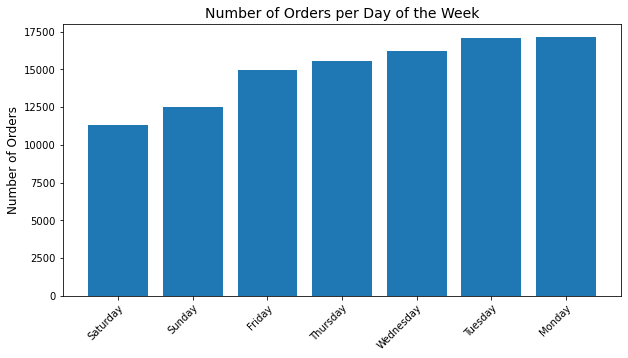

In [81]:
fig = plt.figure(figsize = (10, 5))

plt.bar(per_dow['dow'], per_dow['count'])
 
plt.xlabel("")
plt.xticks(per_dow['dow'], per_dow['dow'], rotation = 45, ha = 'right', rotation_mode = 'anchor')
plt.ylabel("Number of Orders", fontsize = 12)
plt.title("Number of Orders per Day of the Week", fontsize = 14)

plt.show()

Purchases are higher during the weekdays vs the weekends and Monday and Tuesday are the highest.

#### Orders per Hour of the Day

In [82]:
per_hour = visualizations_df.groupby('hour')['order_id'].count().reset_index(name = 'count').sort_values(['count'], ascending = True)
per_hour

,hour,count
19,5,203
18,4,223
17,3,284
20,6,507
12,2,530
1,1,1217
21,7,1269
0,0,2517
22,8,3147
16,23,4340


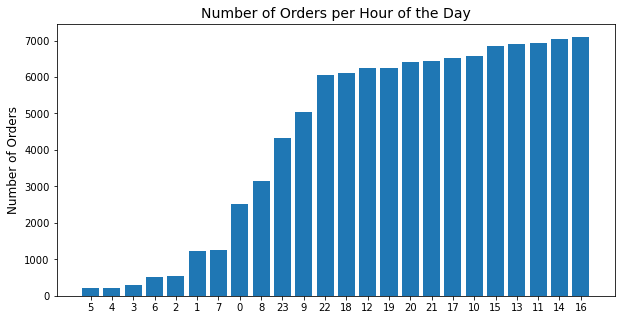

In [83]:
fig = plt.figure(figsize = (10, 5))

plt.bar(per_hour['hour'], per_hour['count'])
 
plt.xlabel("")
plt.xticks(per_hour['hour'], per_hour['hour'])
plt.ylabel("Number of Orders", fontsize = 12)
plt.title("Number of Orders per Hour of the Day", fontsize = 14)

plt.show()

Purchases are mostly made in the evening after 8pm.

#### Top 10 categories purchased

In [84]:
visualizations_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,product_id,price,freight_value,customer_state,product_category_name,year,month,dow,hour,year_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,4,1,87285b34884572647811a353c7ac498a,29.99,8.72,SP,housewares,2017,10,Monday,10,2017-10
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,4,1,87285b34884572647811a353c7ac498a,29.99,7.78,SP,housewares,2017,8,Tuesday,18,2017-08
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,5,1,87285b34884572647811a353c7ac498a,29.99,7.78,SP,housewares,2017,8,Wednesday,18,2017-08
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13,3,1,87285b34884572647811a353c7ac498a,29.99,14.10,SC,housewares,2017,10,Monday,23,2017-10
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,4,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,BA,perfumery,2018,7,Tuesday,20,2018-07


In [85]:
top_categories = visualizations_df.groupby('product_category_name')['order_id'].count() \
                    .reset_index(name = 'count').nlargest(10, 'count')
top_categories

,product_category_name,count
7,bed_bath_table,10475
44,health_beauty,8751
68,sports_leisure,8146
40,furniture_decor,7827
16,computers_accessories,7410
50,housewares,6307
73,watches_gifts,5529
71,telephony,4231
43,garden_tools,4186
72,toys,3899


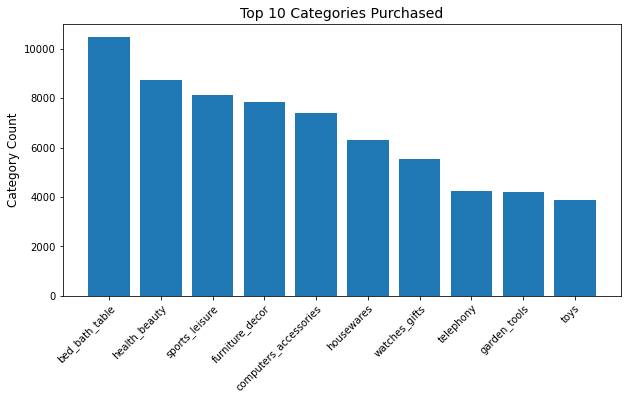

In [86]:
fig = plt.figure(figsize = (10, 5))

plt.bar(top_categories['product_category_name'], top_categories['count'])
 
plt.xlabel("")
plt.xticks(top_categories['product_category_name'], top_categories['product_category_name'], rotation = 45, ha = 'right', rotation_mode = 'anchor')
plt.ylabel("Category Count", fontsize = 12)
plt.title("Top 10 Categories Purchased", fontsize = 14)

plt.show()

#### Top 10 categories purchased in amount purchased

In [87]:
top_categories_amt = visualizations_df.groupby(['product_category_name'])["price"].sum().reset_index(name = 'total').nlargest(10, 'total')
top_categories_amt

,product_category_name,total
44,health_beauty,1128005.33
73,watches_gifts,1121928.18
7,bed_bath_table,978821.48
68,sports_leisure,932107.19
16,computers_accessories,872991.14
40,furniture_decor,682621.60
21,cool_stuff,612096.10
50,housewares,568963.32
5,auto,541243.76
43,garden_tools,465154.67


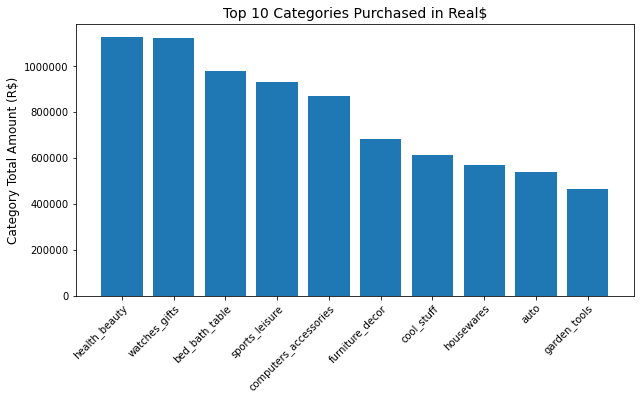

In [88]:
fig, ax = plt.subplots(figsize = (10, 5))

ax.bar(top_categories_amt['product_category_name'], top_categories_amt['total'])
 
plt.xlabel("")
plt.xticks(top_categories_amt['product_category_name'], top_categories_amt['product_category_name'], rotation = 45, ha = 'right', rotation_mode = 'anchor')
ax.ticklabel_format(axis="y", useOffset=False, style='plain')
plt.ylabel("Category Total Amount (R$)", fontsize = 12)
plt.title("Top 10 Categories Purchased in Real$", fontsize = 14)

plt.show()

The top categories purchased at bed/bath/table and health/beauty.

#### Number of orders per State

In [89]:
states = visualizations_df.groupby('customer_state')['order_id'].count().reset_index(name = 'count').sort_values(['count'], ascending = True)
states

,customer_state,count
21,RR,49
3,AP,79
0,AC,89
2,AM,160
20,RO,268
26,TO,299
24,SE,357
1,AL,426
19,RN,502
16,PI,516


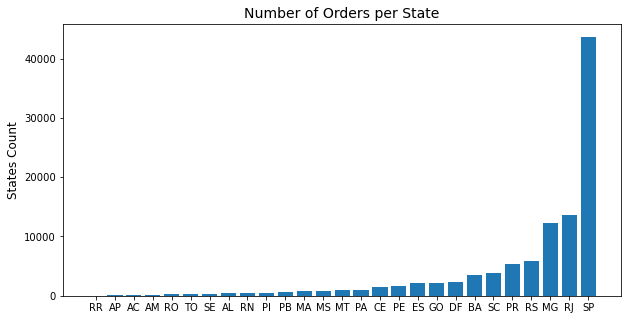

In [90]:
fig, ax = plt.subplots(figsize = (10, 5))

plt.bar(states['customer_state'], states['count'])
 
plt.xlabel("")
plt.xticks(states['customer_state'], states['customer_state'])
plt.ylabel("States Count", fontsize = 12)
plt.title("Number of Orders per State", fontsize = 14)

plt.show()

# Save figure
ax.get_figure().savefig('images/orders_per_state.png',
           bbox_inches = 'tight',
           transparent = True)

Sao Paulo has the far most orders of the country

#### Review Score

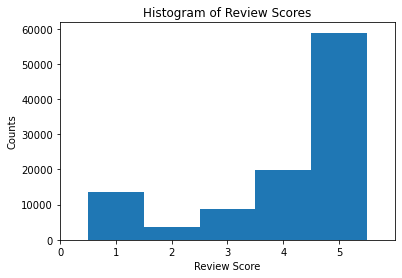

In [91]:
# Histogram of review scores
fig, ax = plt.subplots()

bins = np.arange(7) - 0.5
ax.hist(visualizations_df['review_score'], bins = bins)
plt.xticks(range(6))
plt.xlim([0, 6])
plt.title('Histogram of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Counts')

plt.show()

There are more 5 scores than the others.

#### Review Scores per Order Status

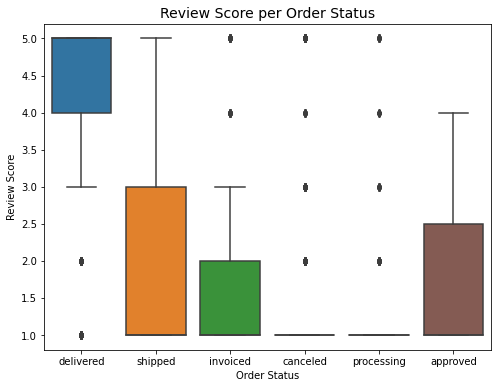

In [92]:
fig = plt.subplots(figsize = (8, 6))

sns.boxplot(x = 'order_status', y = 'review_score', data = visualizations_df )
plt.ylabel("Review Score")
plt.xlabel("Order Status")
plt.title("Review Score per Order Status", fontsize = 14)

plt.show()

The highest scores are with the delivered purchases

#### Review Score to Difference between purchase date and delivered date

In [93]:
# Create new feature for Order Purchase Date - Delivered Customer Date to get difference in days
visualizations_df['cust_delivery_diff'] = (visualizations_df['order_delivered_customer_date'] - visualizations_df['order_purchase_timestamp']).dt.days
visualizations_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,...,price,freight_value,customer_state,product_category_name,year,month,dow,hour,year_month,cust_delivery_diff
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,4,1,...,29.99,8.72,SP,housewares,2017,10,Monday,10,2017-10,8.0
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,4,1,...,29.99,7.78,SP,housewares,2017,8,Tuesday,18,2017-08,2.0
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,5,1,...,29.99,7.78,SP,housewares,2017,8,Wednesday,18,2017-08,5.0
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13,3,1,...,29.99,14.10,SC,housewares,2017,10,Monday,23,2017-10,14.0
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,4,1,...,118.70,22.76,BA,perfumery,2018,7,Tuesday,20,2018-07,13.0


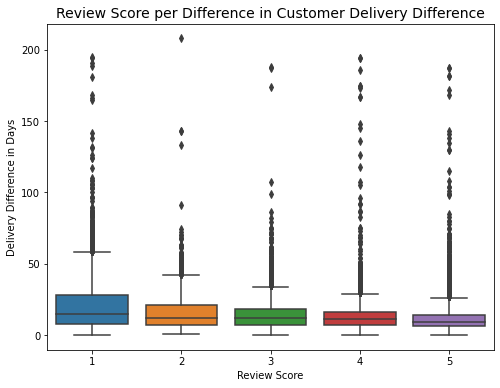

In [94]:
fig = plt.subplots(figsize = (8, 6))

sns.boxplot(x = 'review_score', y = 'cust_delivery_diff', data = visualizations_df )
plt.xlabel("Review Score")
plt.ylabel("Delivery Difference in Days")
plt.title("Review Score per Difference in Customer Delivery Difference", fontsize = 14)

plt.show()

The less days between purchase date and delivery date on average has higher scores.

#### Review Score to Difference between estimated delivery date and delivered date

In [95]:
# Create new feature for Order Estimated Delivery Date - Delivered Customer Date to get difference in days
visualizations_df['est_delivery_diff'] = (visualizations_df['order_estimated_delivery_date'] - visualizations_df['order_delivered_customer_date']).dt.days
visualizations_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,...,freight_value,customer_state,product_category_name,year,month,dow,hour,year_month,cust_delivery_diff,est_delivery_diff
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,4,1,...,8.72,SP,housewares,2017,10,Monday,10,2017-10,8.0,7.0
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,4,1,...,7.78,SP,housewares,2017,8,Tuesday,18,2017-08,2.0,9.0
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,5,1,...,7.78,SP,housewares,2017,8,Wednesday,18,2017-08,5.0,7.0
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13,3,1,...,14.10,SC,housewares,2017,10,Monday,23,2017-10,14.0,5.0
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,4,1,...,22.76,BA,perfumery,2018,7,Tuesday,20,2018-07,13.0,5.0


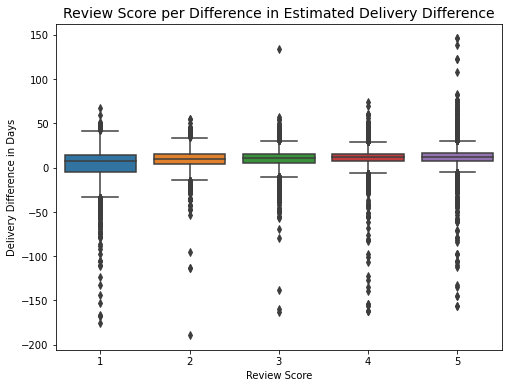

In [96]:
fig = plt.subplots(figsize = (8, 6))

sns.boxplot(x = 'review_score', y = 'est_delivery_diff', data = visualizations_df )
plt.xlabel("Review Score")
plt.ylabel("Delivery Difference in Days")
plt.title("Review Score per Difference in Estimated Delivery Difference", fontsize = 14)

plt.show()

The review scores are about the same if an order was delivered sooner than actual vs later than the actual. There are a lot of outliers on the deliveries that came later.

#### Review Score to Payment Price

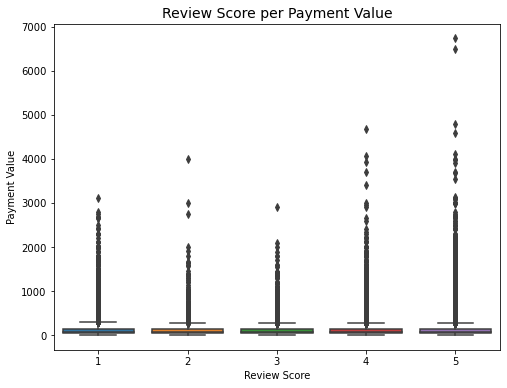

In [97]:
fig = plt.subplots(figsize = (8, 6))

sns.boxplot(x = 'review_score', y = 'price', data = visualizations_df )
plt.xlabel("Review Score")
plt.ylabel("Payment Value")
plt.title("Review Score per Payment Value", fontsize = 14)

plt.show()

#### Review Score to Freight Cost

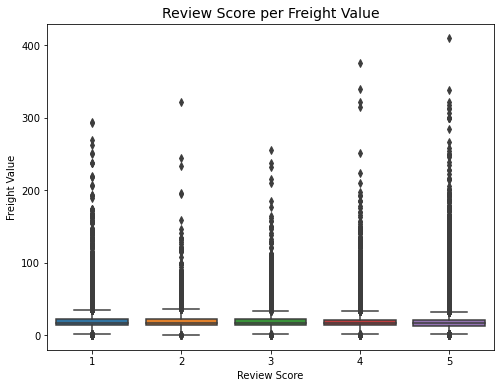

In [98]:
fig = plt.subplots(figsize = (8, 6))

sns.boxplot(x = 'review_score', y = 'freight_value', data = visualizations_df )
plt.xlabel("Review Score")
plt.ylabel("Freight Value")
plt.title("Review Score per Freight Value", fontsize = 14)

plt.show()

These scores all don't seem to matter about freight

#### Top 10 customers in spending

In [99]:
total_spending = visualizations_df.groupby('customer_id')['price'].sum().reset_index(name = 'total')
total_spending.head()

,customer_id,total
0,00012a2ce6f8dcda20d059ce98491703,89.80
1,000161a058600d5901f007fab4c27140,54.90
2,0001fd6190edaaf884bcaf3d49edf079,179.99
3,0002414f95344307404f0ace7a26f1d5,149.90
4,000379cdec625522490c315e70c7a9fb,93.00


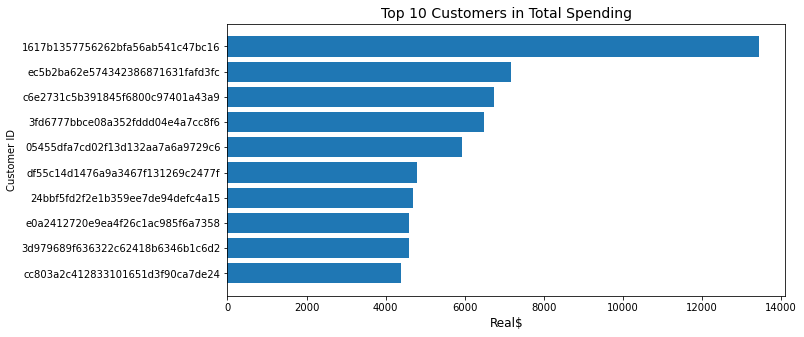

In [100]:
top_spending = total_spending.nlargest(10, 'total')

fig, ax = plt.subplots(figsize = (10, 5))

plt.barh(top_spending['customer_id'], top_spending['total'])
 
plt.ylabel("Customer ID")
plt.yticks(top_spending['customer_id'], top_spending['customer_id'])
plt.xlabel("Real$", fontsize = 12)
plt.title("Top 10 Customers in Total Spending", fontsize = 14)

ax.invert_yaxis()

plt.show()

#### Bottom 20 customers in spending

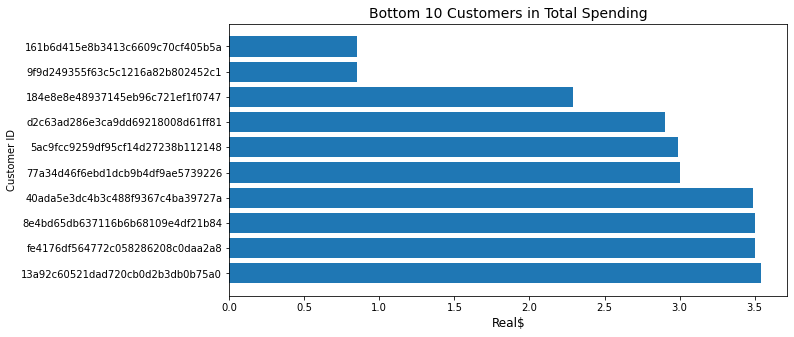

In [101]:
bottom_spending = total_spending.nsmallest(10, 'total')

fig, ax = plt.subplots(figsize = (10, 5))

plt.barh(bottom_spending['customer_id'], bottom_spending['total'])
 
plt.ylabel("Customer ID")
plt.yticks(bottom_spending['customer_id'], bottom_spending['customer_id'])
plt.xlabel("Real$", fontsize = 12)
plt.title("Bottom 10 Customers in Total Spending", fontsize = 14)

ax.invert_yaxis()

plt.show()

#### Top 20 customers in number of orders

In [102]:
number_customers = visualizations_df.groupby('customer_id')['order_id'].count().reset_index(name = 'count')
number_customers.head()

,customer_id,count
0,00012a2ce6f8dcda20d059ce98491703,1
1,000161a058600d5901f007fab4c27140,1
2,0001fd6190edaaf884bcaf3d49edf079,1
3,0002414f95344307404f0ace7a26f1d5,1
4,000379cdec625522490c315e70c7a9fb,1


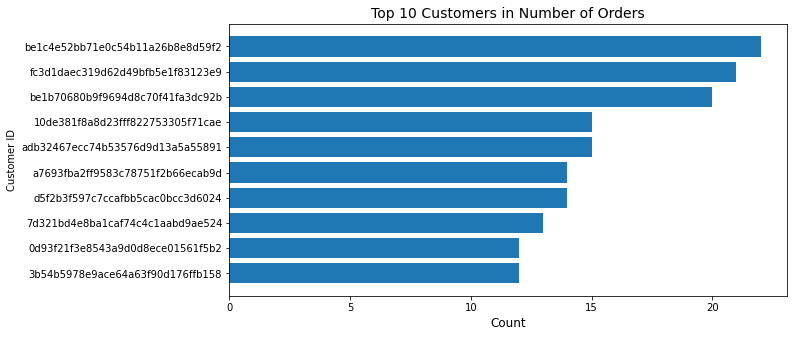

In [103]:
top_customers = number_customers.nlargest(10, 'count')

fig, ax = plt.subplots(figsize = (10, 5))

plt.barh(top_customers['customer_id'], top_customers['count'])
 
plt.ylabel("Customer ID")
plt.yticks(top_customers['customer_id'], top_customers['customer_id'])
plt.xlabel("Count", fontsize = 12)
plt.title("Top 10 Customers in Number of Orders", fontsize = 14)

ax.invert_yaxis()

plt.show()

#### Bottom 20 customers in number of orders

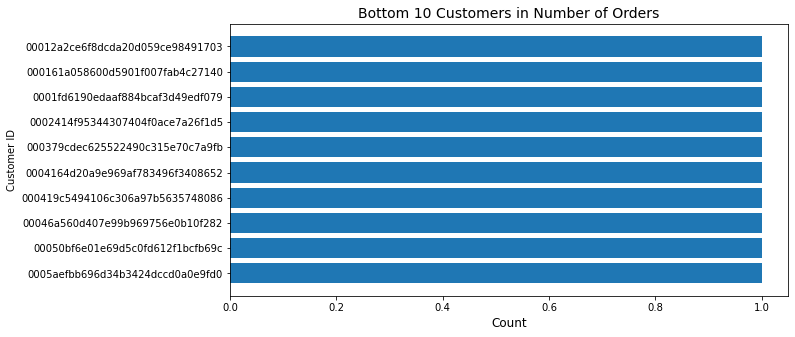

In [104]:
top_customers = number_customers.nsmallest(10, 'count')

fig, ax = plt.subplots(figsize = (10, 5))

plt.barh(top_customers['customer_id'], top_customers['count'])
 
plt.ylabel("Customer ID")
plt.yticks(top_customers['customer_id'], top_customers['customer_id'])
plt.xlabel("Count", fontsize = 12)
plt.title("Bottom 10 Customers in Number of Orders", fontsize = 14)

ax.invert_yaxis()

plt.show()

#### Top 10 customers in number of review scores of 5

In [105]:
review_score_5 = visualizations_df.loc[visualizations_df.review_score == 5]
review_score_5.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,...,freight_value,customer_state,product_category_name,year,month,dow,hour,year_month,cust_delivery_diff,est_delivery_diff
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,5,1,...,7.78,SP,housewares,2017,8,Wednesday,18,2017-08,5.0,7.0
5,40c5e18f7d112b59b3e5113a59a905b3,67407057a7d5ee17d1cd09523f484d13,delivered,2018-06-11 10:25:52,2018-06-11 10:58:32,2018-06-14 13:03:00,2018-06-19 00:31:13,2018-07-16,5,1,...,8.78,RJ,perfumery,2018,6,Monday,10,2018-06,7.0,26.0
6,f913d229653fdd809c249ed98ab6b754,e1365d7b227b247b6bc0931771885eaf,delivered,2018-04-30 02:18:32,2018-04-30 03:00:14,2018-04-30 13:54:00,2018-05-08 17:53:51,2018-05-24,5,1,...,17.55,RS,perfumery,2018,4,Monday,2,2018-04,8.0,15.0
7,9b85bbefeeacfebc3ff603d20511734f,7f4f07b97783e894fccff9d72e0988b3,delivered,2017-11-27 10:32:51,2017-11-27 11:14:36,2017-11-29 15:16:47,2017-12-07 19:48:32,2017-12-20,5,1,...,16.21,SC,perfumery,2017,11,Monday,10,2017-11,10.0,12.0
8,df972aca1fba0a417674857678e2c4bb,322eae54daccdcbee96799ebd3a67830,delivered,2018-05-21 11:39:30,2018-05-21 15:32:00,2018-05-24 10:48:00,2018-06-02 15:28:45,2018-06-07,5,1,...,15.72,SP,perfumery,2018,5,Monday,11,2018-05,12.0,4.0


In [106]:
top_customers_5 = review_score_5.groupby('customer_id')['review_score'].count().reset_index(name = 'count').nlargest(10, 'count')
top_customers_5

,customer_id,count
3469,10de381f8a8d23fff822753305f71cae,15
35785,adb32467ecc74b53576d9d13a5a55891,15
2778,0d93f21f3e8543a9d0d8ece01561f5b2,12
6571,1ff773612ab8934db89fd5afa8afe506,10
44310,d6646ea91d8cd9fc7e6882a7068779d4,10
37805,b7770073b02ed1d626a027ce86a4ff82,9
2960,0e772d9e02b17408e716f35cd1dcc222,8
6734,20c93357daf05d1c3a092be59aea2c2b,8
21239,679f84ceb2ee4ca5bca0c3ea34647746,8
37222,b4afeb58ac51bc903c5362286c6a5cfe,8


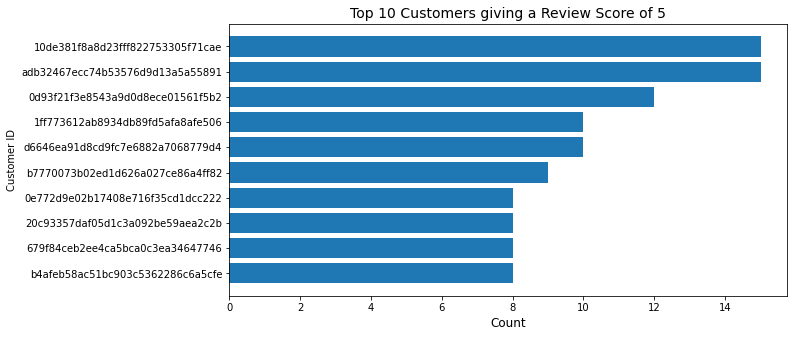

In [107]:
fig, ax = plt.subplots(figsize = (10, 5))

plt.barh(top_customers_5['customer_id'], top_customers_5['count'])
 
plt.ylabel("Customer ID")
plt.yticks(top_customers_5['customer_id'], top_customers_5['customer_id'])
plt.xlabel("Count", fontsize = 12)
plt.title("Top 10 Customers giving a Review Score of 5", fontsize = 14)

ax.invert_yaxis()

plt.show()

In [108]:
top_10 = visualizations_df['customer_id'].isin(top_customers_5['customer_id'])
top_10_customers_df = visualizations_df[top_10]
top_10_customers_df.drop_duplicates(subset = ['order_id', 'customer_id'], keep = 'first', inplace = True)
top_10_customers_df

C:\Users\Osgiliath\AppData\Local\Temp\ipykernel_3696\1001230421.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_customers_df.drop_duplicates(subset = ['order_id', 'customer_id'], keep = 'first', inplace = True)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,...,freight_value,customer_state,product_category_name,year,month,dow,hour,year_month,cust_delivery_diff,est_delivery_diff
4201,30bdf3d824d824610a49887486debcaf,d6646ea91d8cd9fc7e6882a7068779d4,delivered,2018-03-27 14:29:03,2018-03-27 14:47:43,2018-03-29 01:14:42,2018-04-03 16:48:50,2018-04-24,5,2,...,14.51,SP,computers_accessories,2018,3,Tuesday,14,2018-03,7.0,20.0
4350,3cb5915708fd5b47246994508f858ffd,679f84ceb2ee4ca5bca0c3ea34647746,delivered,2017-11-16 14:36:08,2017-11-18 02:29:03,2017-11-21 10:15:36,2017-12-06 18:42:29,2017-12-11,5,1,...,17.67,SC,garden_tools,2017,11,Thursday,14,2017-11,20.0,4.0
13293,acbe07f22f29ad7e5a78f30008cc6ec7,b4afeb58ac51bc903c5362286c6a5cfe,delivered,2017-11-18 14:33:04,2017-11-18 19:06:16,2017-11-27 18:34:31,2017-11-29 17:58:43,2017-12-05,5,1,...,11.73,SP,drinks,2017,11,Saturday,14,2017-11,11.0,5.0
49414,428a2f660dc84138d969ccd69a0ab6d5,10de381f8a8d23fff822753305f71cae,delivered,2017-11-23 20:30:52,2017-11-24 10:31:10,2017-11-28 16:42:21,2017-12-13 20:19:35,2017-12-19,5,1,...,16.22,PR,furniture_decor,2017,11,Thursday,20,2017-11,19.0,5.0
54499,df56136b8031ecd28e200bb18e6ddb2e,b7770073b02ed1d626a027ce86a4ff82,delivered,2017-01-26 13:15:41,2017-01-27 03:05:27,2017-01-31 19:44:07,2017-02-06 09:52:10,2017-03-23,5,3,...,31.65,RS,sports_leisure,2017,1,Thursday,13,2017-01,10.0,44.0
67152,2c2a19b5703863c908512d135aa6accc,0d93f21f3e8543a9d0d8ece01561f5b2,delivered,2017-10-09 20:45:45,2017-10-11 03:26:49,2017-10-11 21:14:36,2017-10-18 16:19:17,2017-10-27,5,1,...,16.11,MG,housewares,2017,10,Monday,20,2017-10,8.0,8.0
67939,e8fa22c3673b1dd17ea315021b1f0f61,1ff773612ab8934db89fd5afa8afe506,delivered,2018-04-19 13:54:06,2018-04-20 07:15:19,2018-04-24 16:08:50,2018-05-03 16:39:41,2018-05-22,5,1,...,16.87,RJ,drinks,2018,4,Thursday,13,2018-04,14.0,18.0
77657,9a2b443dc8e6673e4fc330b3ea033569,20c93357daf05d1c3a092be59aea2c2b,delivered,2018-04-13 10:09:10,2018-04-17 05:50:06,2018-04-17 16:54:45,2018-04-23 23:22:07,2018-05-08,5,1,...,16.91,SP,drinks,2018,4,Friday,10,2018-04,10.0,14.0
90355,c27cd942c2a926d25153090afa106ceb,0e772d9e02b17408e716f35cd1dcc222,delivered,2017-06-15 14:26:01,2017-06-15 14:45:15,2017-06-20 14:22:03,2017-06-26 11:23:32,2017-07-10,5,2,...,11.85,SP,bed_bath_table,2017,6,Thursday,14,2017-06,10.0,13.0
96279,9ef13efd6949e4573a18964dd1bbe7f5,adb32467ecc74b53576d9d13a5a55891,delivered,2017-01-30 21:44:49,2017-01-30 22:33:45,2017-02-01 14:34:10,2017-02-14 10:48:10,2017-03-07,5,1,...,1.20,GO,garden_tools,2017,1,Monday,21,2017-01,14.0,20.0


In [109]:
# get differences in days for these customers to see if there is a trend
top_10_customers_df['cust_delivery_diff'] = (top_10_customers_df['order_delivered_customer_date'] - 
                                             top_10_customers_df['order_purchase_timestamp']).dt.days
top_10_customers_df['est_delivery_diff'] = (top_10_customers_df['order_estimated_delivery_date'] - 
                                            top_10_customers_df['order_delivered_customer_date']).dt.days

C:\Users\Osgiliath\AppData\Local\Temp\ipykernel_3696\2187837733.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_customers_df['cust_delivery_diff'] = (top_10_customers_df['order_delivered_customer_date'] -
C:\Users\Osgiliath\AppData\Local\Temp\ipykernel_3696\2187837733.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_customers_df['est_delivery_diff'] = (top_10_customers_df['order_estimated_delivery_date'] -


In [110]:
top_10_customers_df[['customer_id', 'review_score', 'order_status', 'price', 'freight_value', 'product_category_name', 'cust_delivery_diff', 'est_delivery_diff']]

,customer_id,review_score,order_status,price,freight_value,product_category_name,cust_delivery_diff,est_delivery_diff
4201,d6646ea91d8cd9fc7e6882a7068779d4,5,delivered,81.99,14.51,computers_accessories,7,20
4350,679f84ceb2ee4ca5bca0c3ea34647746,5,delivered,59.90,17.67,garden_tools,20,4
13293,b4afeb58ac51bc903c5362286c6a5cfe,5,delivered,19.30,11.73,drinks,11,5
49414,10de381f8a8d23fff822753305f71cae,5,delivered,65.49,16.22,furniture_decor,19,5
54499,b7770073b02ed1d626a027ce86a4ff82,5,delivered,66.90,31.65,sports_leisure,10,44
67152,0d93f21f3e8543a9d0d8ece01561f5b2,5,delivered,20.70,16.11,housewares,8,8
67939,1ff773612ab8934db89fd5afa8afe506,5,delivered,284.99,16.87,drinks,14,18
77657,20c93357daf05d1c3a092be59aea2c2b,5,delivered,20.50,16.91,drinks,10,14
90355,0e772d9e02b17408e716f35cd1dcc222,5,delivered,36.99,11.85,bed_bath_table,10,13
96279,adb32467ecc74b53576d9d13a5a55891,5,delivered,51.00,1.20,garden_tools,14,20


#### Top 10 customers in number of review scores of 1

In [111]:
review_score_1 = visualizations_df.loc[visualizations_df.review_score == 1]
review_score_1.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,...,freight_value,customer_state,product_category_name,year,month,dow,hour,year_month,cust_delivery_diff,est_delivery_diff
10,6552ae78f1de31bcde1fc2cfcab0d25d,ccb212cf6faf1356d9b5509259de0940,delivered,2018-05-17 14:05:28,2018-05-18 02:14:44,2018-05-23 12:44:00,2018-06-18 20:34:58,2018-06-07,1,1,...,18.72,SP,perfumery,2018,5,Thursday,14,2018-05,32.0,-12.0
26,fc74153e0ac39bb68c8f8f9e4758f001,787c8dad81798b72c5ae7d0ed526192e,delivered,2018-04-12 12:40:46,2018-04-13 12:50:48,2018-04-18 20:51:19,2018-06-29 17:03:25,2018-05-11,1,1,...,51.32,RN,perfumery,2018,4,Thursday,12,2018-04,78.0,-50.0
46,29f95ab000e30a2a4dbeedb73c7357f2,a13f758577dd5c5b1b1897f294c2da52,delivered,2017-09-18 20:42:08,2017-09-18 20:55:17,2017-09-19 15:09:31,2017-09-20 20:13:23,2017-09-28,1,1,...,9.19,SP,perfumery,2017,9,Monday,20,2017-09,1.0,7.0
79,3a53d5a9a0c58d291ff3ae407b6df5fd,5612aa60cdbbd8e9d89ae0c409080375,shipped,2018-02-16 21:55:03,2018-02-17 01:26:58,2018-02-19 16:14:14,NaT,2018-03-14,1,1,...,16.27,RS,perfumery,2018,2,Friday,21,2018-02,NaN,NaN
87,177777137ce0af9e9cd2cff572728cca,fedcdc6c89d60699c967422066834f65,delivered,2018-02-18 09:28:26,2018-02-18 09:46:23,2018-02-19 16:18:58,2018-02-28 20:04:15,2018-03-12,1,1,...,12.83,RJ,perfumery,2018,2,Sunday,9,2018-02,10.0,11.0


In [112]:
top_customers_1 = review_score_1.groupby('customer_id')['review_score'].count().reset_index(name = 'count').nlargest(10, 'count')
top_customers_1.head()

,customer_id,count
7659,be1c4e52bb71e0c54b11a26b8e8d59f2,22
10115,fc3d1daec319d62d49bfb5e1f83123e9,21
7658,be1b70680b9f9694d8c70f41fa3dc92b,20
6713,a7693fba2ff9583c78751f2b66ecab9d,14
8578,d5f2b3f597c7ccafbb5cac0bcc3d6024,14


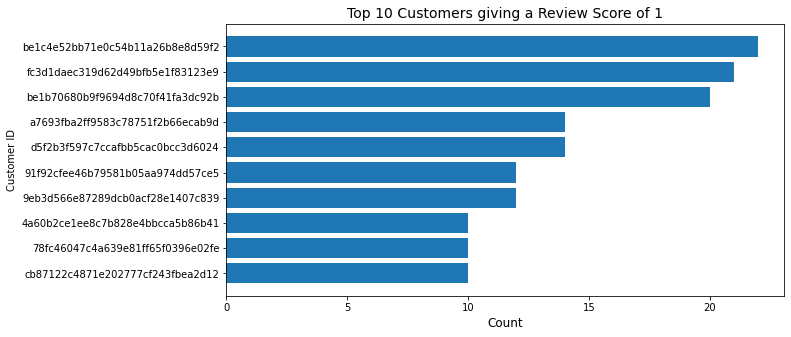

In [113]:
fig, ax = plt.subplots(figsize = (10, 5))

plt.barh(top_customers_1['customer_id'], top_customers_1['count'])
 
plt.ylabel("Customer ID")
plt.yticks(top_customers_1['customer_id'], top_customers_1['customer_id'])
plt.xlabel("Count", fontsize = 12)
plt.title("Top 10 Customers giving a Review Score of 1", fontsize = 14)

ax.invert_yaxis()

plt.show()

In [114]:
bottom_10 = visualizations_df['customer_id'].isin(top_customers_1['customer_id'])
bottom_10_customers_df = visualizations_df[bottom_10]
bottom_10_customers_df.drop_duplicates(subset = ['order_id', 'customer_id'], keep = 'first', inplace = True)
bottom_10_customers_df

C:\Users\Osgiliath\AppData\Local\Temp\ipykernel_3696\4050889330.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bottom_10_customers_df.drop_duplicates(subset = ['order_id', 'customer_id'], keep = 'first', inplace = True)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,...,freight_value,customer_state,product_category_name,year,month,dow,hour,year_month,cust_delivery_diff,est_delivery_diff
6639,3a213fcdfe7d98be74ea0dc05a8b31ae,91f92cfee46b79581b05aa974dd57ce5,delivered,2018-01-11 10:03:39,2018-01-13 02:11:05,2018-01-15 22:51:59,2018-01-22 19:51:44,2018-02-05,1,1,...,15.52,PR,watches_gifts,2018,1,Thursday,10,2018-01,11.0,13.0
19725,73c8ab38f07dc94389065f7eba4f297a,d5f2b3f597c7ccafbb5cac0bcc3d6024,delivered,2017-12-13 14:21:15,2017-12-15 02:30:41,2017-12-15 18:45:18,2017-12-28 09:05:34,2018-01-08,1,1,...,13.43,SP,garden_tools,2017,12,Wednesday,14,2017-12,14.0,10.0
24699,f80549a97eb203e1566e026ab66f045b,4a60b2ce1ee8c7b828e4bbcca5b86b41,delivered,2017-09-12 10:31:42,2017-09-13 03:15:47,2017-09-19 13:32:36,2017-09-26 15:25:15,2017-09-28,1,1,...,38.81,SP,computers_accessories,2017,9,Tuesday,10,2017-09,14.0,1.0
25887,5a3b1c29a49756e75f1ef513383c0c12,be1c4e52bb71e0c54b11a26b8e8d59f2,delivered,2017-10-17 13:06:29,2017-10-18 13:06:21,2017-10-20 19:09:07,2017-10-22 14:43:54,2017-11-03,1,1,...,7.10,SP,bed_bath_table,2017,10,Tuesday,13,2017-10,5.0,11.0
37089,f60ce04ff8060152c83c7c97e246d6a8,78fc46047c4a639e81ff65f0396e02fe,delivered,2017-11-28 22:24:18,2017-11-28 22:31:34,2017-11-29 19:48:33,2017-12-04 22:22:20,2017-12-18,1,1,...,34.04,SP,furniture_living_room,2017,11,Tuesday,22,2017-11,5.0,13.0
46421,1b15974a0141d54e36626dca3fdc731a,be1b70680b9f9694d8c70f41fa3dc92b,delivered,2018-02-22 15:30:41,2018-02-24 03:20:27,2018-03-02 00:18:01,2018-03-05 15:22:27,2018-03-08,1,1,...,10.12,SP,computers_accessories,2018,2,Thursday,15,2018-02,10.0,2.0
68674,9f5054bd9a3c71702aa0917a7da29193,cb87122c4871e202777cf243fbea2d12,delivered,2017-10-05 09:13:21,2017-10-06 02:14:23,2017-10-09 19:22:42,2017-10-16 21:07:36,2017-11-09,1,4,...,0.14,RS,computers_accessories,2017,10,Thursday,9,2017-10,11.0,23.0
77621,9bdc4d4c71aa1de4606060929dee888c,a7693fba2ff9583c78751f2b66ecab9d,delivered,2018-02-21 11:45:07,2018-02-22 11:48:42,2018-02-27 18:27:01,2018-03-01 20:47:01,2018-03-07,1,1,...,7.78,SP,telephony,2018,2,Wednesday,11,2018-02,8.0,5.0
102470,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28,1,1,...,7.89,SP,health_beauty,2017,7,Sunday,18,2017-07,14.0,-4.0
102724,af822dacd6f5cff7376413c03a388bb7,9eb3d566e87289dcb0acf28e1407c839,delivered,2018-06-08 16:42:11,2018-06-08 19:31:06,2018-06-13 14:44:00,2018-06-18 21:04:38,2018-06-28,1,1,...,15.23,MG,housewares,2018,6,Friday,16,2018-06,10.0,9.0


In [115]:
# get differences in days for these customers to see if there is a trend
bottom_10_customers_df['cust_delivery_diff'] = (bottom_10_customers_df['order_delivered_customer_date'] - bottom_10_customers_df['order_purchase_timestamp']).dt.days
bottom_10_customers_df['est_delivery_diff'] = (bottom_10_customers_df['order_estimated_delivery_date'] - bottom_10_customers_df['order_delivered_customer_date']).dt.days

C:\Users\Osgiliath\AppData\Local\Temp\ipykernel_3696\4243316081.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bottom_10_customers_df['cust_delivery_diff'] = (bottom_10_customers_df['order_delivered_customer_date'] - bottom_10_customers_df['order_purchase_timestamp']).dt.days
C:\Users\Osgiliath\AppData\Local\Temp\ipykernel_3696\4243316081.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bottom_10_customers_df['est_delivery_diff'] = (bottom_10_customers_df['order_estimated_delivery_date'] - bottom_10

In [116]:
bottom_10_customers_df[['customer_id', 'review_score', 'order_status', 'price', 'freight_value', 'product_category_name', 'cust_delivery_diff', 'est_delivery_diff']]

,customer_id,review_score,order_status,price,freight_value,product_category_name,cust_delivery_diff,est_delivery_diff
6639,91f92cfee46b79581b05aa974dd57ce5,1,delivered,108.00,15.52,watches_gifts,11,13
19725,d5f2b3f597c7ccafbb5cac0bcc3d6024,1,delivered,59.00,13.43,garden_tools,14,10
24699,4a60b2ce1ee8c7b828e4bbcca5b86b41,1,delivered,137.90,38.81,computers_accessories,14,1
25887,be1c4e52bb71e0c54b11a26b8e8d59f2,1,delivered,49.99,7.10,bed_bath_table,5,11
37089,78fc46047c4a639e81ff65f0396e02fe,1,delivered,109.97,34.04,furniture_living_room,5,13
46421,be1b70680b9f9694d8c70f41fa3dc92b,1,delivered,100.00,10.12,computers_accessories,10,2
68674,cb87122c4871e202777cf243fbea2d12,1,delivered,149.91,0.14,computers_accessories,11,23
77621,a7693fba2ff9583c78751f2b66ecab9d,1,delivered,29.99,7.78,telephony,8,5
102470,fc3d1daec319d62d49bfb5e1f83123e9,1,delivered,1.20,7.89,health_beauty,14,-4
102724,9eb3d566e87289dcb0acf28e1407c839,1,delivered,5.31,15.23,housewares,10,9


### Final Dataset

In [117]:
olist_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,product_id,price,freight_value,customer_state,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,4,1,87285b34884572647811a353c7ac498a,29.99,8.72,SP,housewares
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,4,1,87285b34884572647811a353c7ac498a,29.99,7.78,SP,housewares
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,5,1,87285b34884572647811a353c7ac498a,29.99,7.78,SP,housewares
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13,3,1,87285b34884572647811a353c7ac498a,29.99,14.10,SC,housewares
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,4,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,BA,perfumery


In [118]:
olist_df.describe()

,review_score,order_item_id,price,freight_value
count,104782.000000,104782.000000,104782.000000,104782.000000
mean,4.021502,1.197868,120.516142,19.941800
std,1.394186,0.698074,181.862447,15.688334
min,1.000000,1.000000,0.850000,0.000000
25%,4.000000,1.000000,39.900000,13.080000
50%,5.000000,1.000000,74.990000,16.220000
75%,5.000000,1.000000,134.900000,21.120000
max,5.000000,21.000000,6735.000000,409.680000


In [119]:
olist_df.describe(include = 'O')

,order_id,customer_id,order_status,product_id,customer_state,product_category_name
count,104782,104782,104782,104782,104782,104782
unique,91182,91182,6,30542,27,74
top,5a3b1c29a49756e75f1ef513383c0c12,be1c4e52bb71e0c54b11a26b8e8d59f2,delivered,aca2eb7d00ea1a7b8ebd4e68314663af,SP,bed_bath_table
freq,22,22,102576,521,43635,10475


In [120]:
olist_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1089
order_delivered_customer_date    2205
order_estimated_delivery_date       0
review_score                        0
order_item_id                       0
product_id                          0
price                               0
freight_value                       0
customer_state                      0
product_category_name               0
dtype: int64

In [121]:
olist_df.shape

(104782, 15)

### RFM Analysis

#### Recency

Get the last date of purchase. Find the most recent date and calculate number of days from the other purchases compared to this date.

In [122]:
# Group dataset by customer id and get the max purchase date
recency_df = olist_df.groupby(by = 'customer_id', as_index = False)['order_purchase_timestamp'].max()
recency_df.rename(columns = {"order_purchase_timestamp": "last_purchase_date"}, inplace = True)
recency_df["last_purchase_date"] = pd.to_datetime(recency_df["last_purchase_date"])
recency_df.head()

,customer_id,last_purchase_date
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17


In [123]:
# Get the most recent purchase date and use it to calculate number of days from this date on other rows
recent_date = olist_df['order_purchase_timestamp'].max()
recency_df['Recency'] = recency_df['last_purchase_date'].apply(lambda x: (recent_date - x).days)

In [124]:
recency_df.head()

,customer_id,last_purchase_date,Recency
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,259
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,380
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,518
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,349
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,120


#### Frequency

Get the number of items a customer purchased and use this as the frequency (number of rows per customer id)

In [125]:
frequency_df = olist_df.groupby(by = 'customer_id', as_index = False)['order_id'].count()
frequency_df.columns = ['customer_id', 'Frequency']
frequency_df.head()

,customer_id,Frequency
0,00012a2ce6f8dcda20d059ce98491703,1
1,000161a058600d5901f007fab4c27140,1
2,0001fd6190edaaf884bcaf3d49edf079,1
3,0002414f95344307404f0ace7a26f1d5,1
4,000379cdec625522490c315e70c7a9fb,1


In [126]:
frequency_df.describe()

,Frequency
count,91182.000000
mean,1.149152
std,0.554204
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,22.000000


#### Monetary

Get the total amount a customer purchased

In [127]:
monetary_df = olist_df.groupby(by = 'customer_id', as_index = False)['price'].sum()
monetary_df.columns = ['customer_id', 'Monetary']
monetary_df.head()

,customer_id,Monetary
0,00012a2ce6f8dcda20d059ce98491703,89.80
1,000161a058600d5901f007fab4c27140,54.90
2,0001fd6190edaaf884bcaf3d49edf079,179.99
3,0002414f95344307404f0ace7a26f1d5,149.90
4,000379cdec625522490c315e70c7a9fb,93.00


#### Merge the 3 datasets

In [128]:
rf_df = recency_df.merge(frequency_df, on = 'customer_id')
rfm_df = rf_df.merge(monetary_df, on = 'customer_id').drop(columns = 'last_purchase_date')

In [129]:
rfm_df.head() 

,customer_id,Recency,Frequency,Monetary
0,00012a2ce6f8dcda20d059ce98491703,259,1,89.80
1,000161a058600d5901f007fab4c27140,380,1,54.90
2,0001fd6190edaaf884bcaf3d49edf079,518,1,179.99
3,0002414f95344307404f0ace7a26f1d5,349,1,149.90
4,000379cdec625522490c315e70c7a9fb,120,1,93.00


In [130]:
rfm_df.tail() 

,customer_id,Recency,Frequency,Monetary
91177,fffcb937e9dd47a13f05ecb8290f4d3e,136,1,78.0
91178,fffecc9f79fd8c764f843e9951b11341,124,1,54.9
91179,fffeda5b6d849fbd39689bb92087f431,70,1,47.9
91180,ffff42319e9b2d713724ae527742af25,48,1,199.9
91181,ffffa3172527f765de70084a7e53aae8,332,2,21.8


**Convert customer_id to index**

In [131]:
rfm_df = rfm_df.set_index('customer_id')
rfm_df.head()

,Recency,Frequency,Monetary
customer_id,,,
00012a2ce6f8dcda20d059ce98491703,259,1,89.80
000161a058600d5901f007fab4c27140,380,1,54.90
0001fd6190edaaf884bcaf3d49edf079,518,1,179.99
0002414f95344307404f0ace7a26f1d5,349,1,149.90
000379cdec625522490c315e70c7a9fb,120,1,93.00


#### Examine statistical distribution

##### Recency

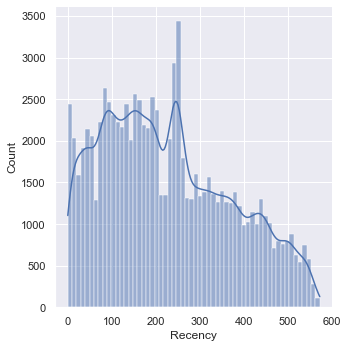

In [132]:
sns.set(rc = {"figure.figsize": (8, 12)})
ax = sns.displot(data = rfm_df, x = 'Recency', kde = True)
plt.show()

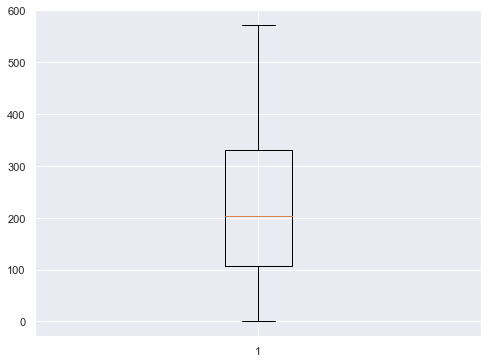

In [133]:
fig, ax = plt.subplots(figsize = (8,6))
ax.boxplot(rfm_df['Recency'])
plt.show()

##### Frequency

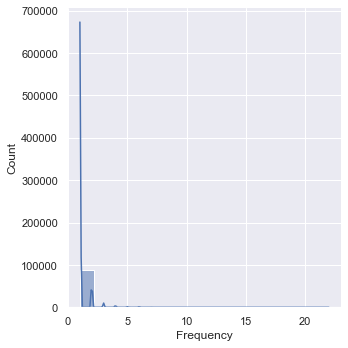

In [134]:
sns.set(rc = {"figure.figsize": (8, 12)})
ax = sns.displot(data = rfm_df, x = 'Frequency', kde = True)
plt.show()

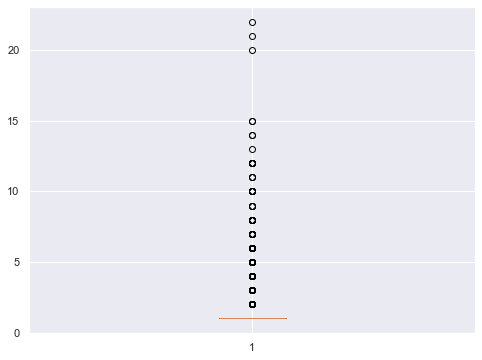

In [135]:
fig, ax = plt.subplots(figsize = (8,6))
ax.boxplot(rfm_df['Frequency'])
plt.show()

##### Monetary Value

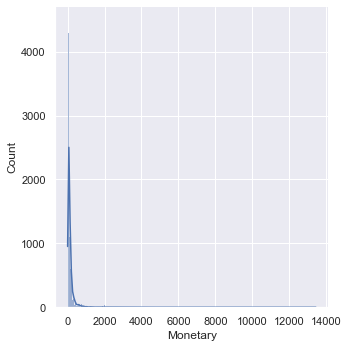

In [136]:
sns.set(rc = {"figure.figsize": (8, 12)})
ax = sns.displot(data = rfm_df, x = 'Monetary', kde = True)
plt.show()

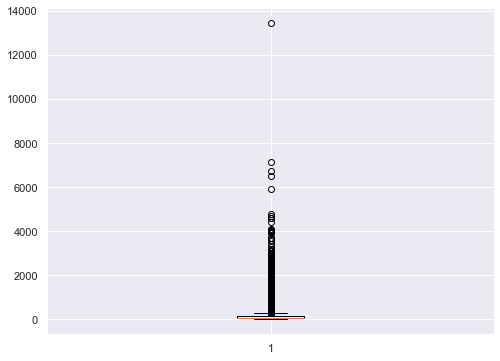

In [137]:
fig, ax = plt.subplots(figsize = (8,6))
ax.boxplot(rfm_df['Monetary'])
plt.show()

### Drop Frequency as all customers have only purchased 1 order with minimal items

In [138]:
rm_df = rfm_df.drop('Frequency', axis = 1)
rm_df.head()

,Recency,Monetary
customer_id,,
00012a2ce6f8dcda20d059ce98491703,259,89.80
000161a058600d5901f007fab4c27140,380,54.90
0001fd6190edaaf884bcaf3d49edf079,518,179.99
0002414f95344307404f0ace7a26f1d5,349,149.90
000379cdec625522490c315e70c7a9fb,120,93.00


#### K-Means Clustering

##### Normalize the dataset

In [139]:
standardizer = StandardScaler()
rm_scaled = standardizer.fit_transform(rm_df)

In [140]:
rm_scaled

array([[ 0.22988532, -0.2310531 ],
       [ 1.06757242, -0.39666251],
       [ 2.0229511 ,  0.19692147],
       ...,
       [-1.0785681 , -0.42987929],
       [-1.23087484,  0.2913995 ],
       [ 0.73526679, -0.55373045]])

#### Silhouette Score

In [141]:
# Clusters for 2 - 6
range_n_clusters = [2, 3, 4, 5, 6]
silhouette_scores = []

for n_clusters in range_n_clusters:

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters = n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(rm_scaled)
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(rm_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}. The average silhouette score is {silhouette_avg}")

For n_clusters = 2. The average silhouette score is 0.46731442416207347
For n_clusters = 3. The average silhouette score is 0.5010325943820231
For n_clusters = 4. The average silhouette score is 0.5111099455792638
For n_clusters = 5. The average silhouette score is 0.43112081689947196
For n_clusters = 6. The average silhouette score is 0.43634171713433667


#### K-Means

With the silhouette analysis, it looks like the optimal number of clusters is 4.

In [142]:
kmeans = KMeans(n_clusters = 4, max_iter = 50)
kmeans.fit(rm_scaled)

KMeans(max_iter=50, n_clusters=4)

In [143]:
# Determine which clusters each data point belongs to
clusters = kmeans.predict(rm_scaled)

In [144]:
# Find the centers of each of the clusters
centers = kmeans.cluster_centers_

**Convert to a dataset**

In [145]:
# Add cluster number to the original data
rm_scaled_clustered = pd.DataFrame(rm_scaled, columns = rm_df.columns, index = rm_df.index)
rm_scaled_clustered['cluster'] = clusters

rm_scaled_clustered.head()

,Recency,Monetary,cluster
customer_id,,,
00012a2ce6f8dcda20d059ce98491703,0.229885,-0.231053,0
000161a058600d5901f007fab4c27140,1.067572,-0.396663,2
0001fd6190edaaf884bcaf3d49edf079,2.022951,0.196921,2
0002414f95344307404f0ace7a26f1d5,0.852958,0.054137,2
000379cdec625522490c315e70c7a9fb,-0.732416,-0.215868,0


### Visualize the Clusters

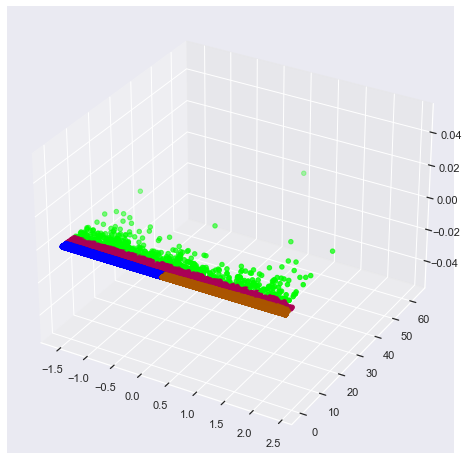

In [146]:
fig = plt.figure()

ax = fig.add_subplot(111, projection = '3d')
                 
ax.scatter(rm_scaled_clustered['Recency'], rm_scaled_clustered['Monetary'], cmap = 'brg',
          c = clusters)
ax.scatter(centers[:, 0], centers[:, 1], c = 'black')

plt.show()

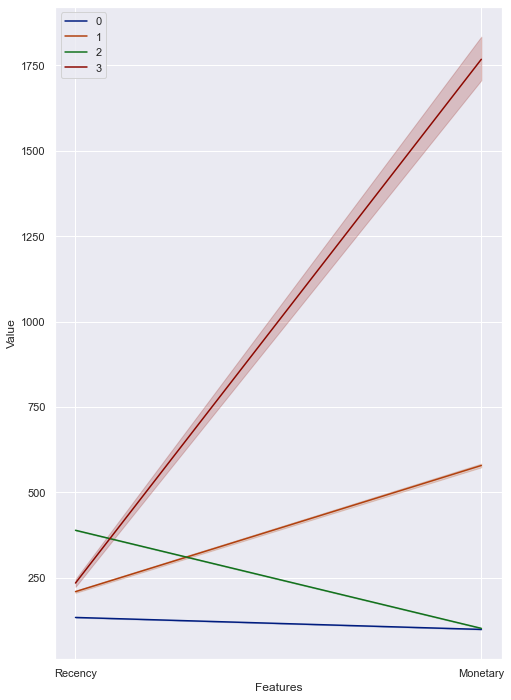

In [147]:
rm_ = pd.DataFrame(standardizer.inverse_transform(rm_scaled))
rm_.columns = rm_df.columns
rm_['customer_id'] = rm_df.index
rm_['cluster'] = kmeans.labels_

rm_melted_normalized = pd.melt(rm_.reset_index(),
                                id_vars = ['customer_id', 'cluster'],
                                value_vars = ['Recency', 'Monetary'],
                                var_name = 'Features',
                                value_name = 'Value')
palette = sns.color_palette("dark", 4)
sns.lineplot(x = 'Features', y = 'Value', hue = 'cluster', palette = palette, data = rm_melted_normalized)
plt.legend()

### Analysis

* Cluster 0: These are customers that have purchased items recently with a low monetary values
* Cluster 1: These are customers that haven't purchased in a while with low monetary values
* Cluster 2: These are customers that haven't purchased in a while with a high monetary value
* Cluster 3: These are customers that have purchased items somewhat recently and have the highest monetary value